# 决策树

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# 导入数据
wine =load_wine()
print("数据维度："+str(wine.data.shape))
print("特征名称："+str(wine.feature_names))
print("标签维度："+str(wine.target.shape))
print("标签名称："+str(wine.target_names))

数据维度：(178, 13)
特征名称：['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
标签维度：(178,)
标签名称：['class_0' 'class_1' 'class_2']


In [171]:
# 连接数据
data=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print(data.shape)

(178, 14)


In [172]:
# 分训练集测试集（特征；标签；test_size：测试集占比）
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [173]:
Xtrain.shape

(124, 13)

In [174]:
Xtest.shape

(54, 13)

In [175]:
# 实例化分类树 
'''
criterion:标准（默认：gini；entropy:信息熵）
random_state:用于设置分支中的随机模式
splitter：best:决策树在分支时选择最重要的特征进行分支；
          random:分支时更为随机，会导致树更深，但是可以防止过拟合
'''
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter='random')
# 用训练集去训练
clf=clf.fit(Xtrain,Ytrain)
# 导入测试集，从接口中获取需要的信息
res=clf.score(Xtest,Ytest)

In [176]:
# 打印预测精准度
print("预测精度：%s"%res)

预测精度：0.9259259259259259


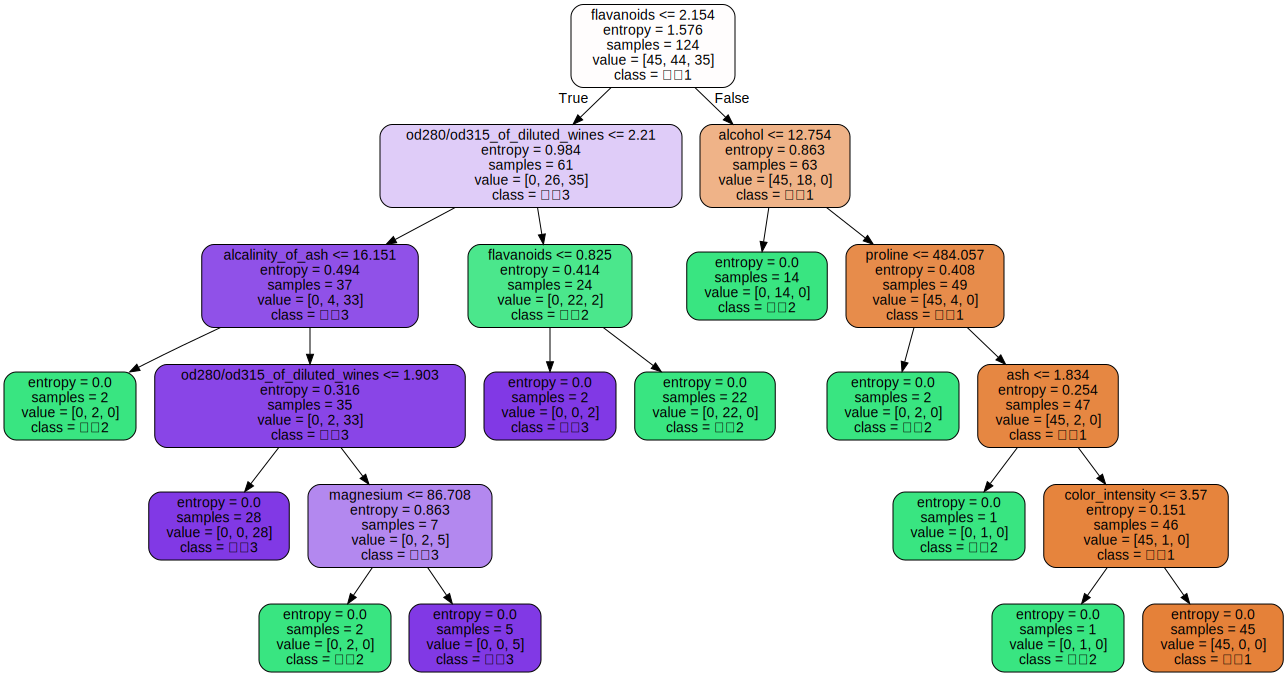

In [177]:
import graphviz  # 导入画树图库

feature_names=wine.feature_names
class_name=wine.target_names
# 初始化
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_names
                              ,class_names=['测试1','测试2','测试3']
                              ,filled=True # 上色 颜色越深，纯度越纯
                              ,rounded=True # 边角圆滑
                             )
graph=graphviz.Source(dot_data)
graph

In [178]:
# 每个特征对应的重要程度
weight=clf.feature_importances_
# 利用pd进行横向拼接
pd.concat(
    [
        pd.DataFrame(wine.feature_names,columns=['name']),
        pd.DataFrame(weight,columns=['weight'])
    ]
    ,axis=1)

,name,weight
0,alcohol,0.175952
1,malic_acid,0.000000
2,ash,0.025489
3,alcalinity_of_ash,0.036966
4,magnesium,0.030913
5,total_phenols,0.000000
6,flavanoids,0.465412
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.035562


## 剪枝-防止过拟合

In [179]:
# 查看训练集准确度
clf.score(Xtrain,Ytrain)

1.0

### 1. max_depth 限制树的最大深度（一般从3开始）

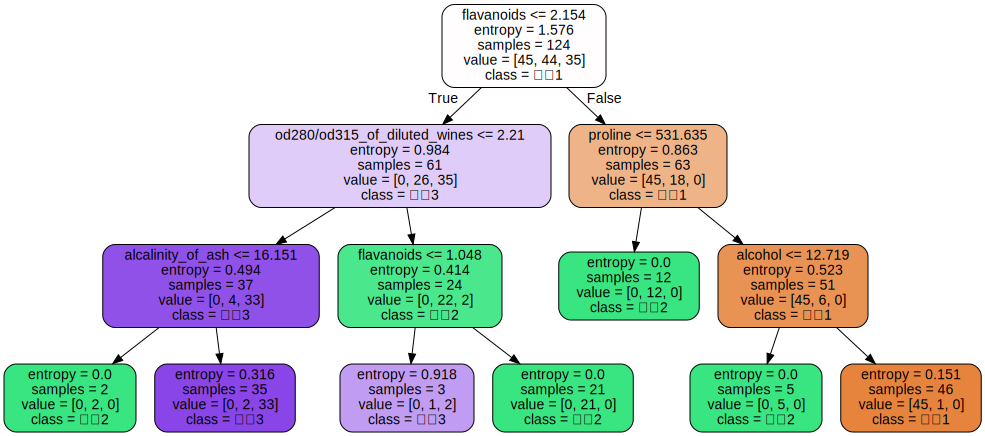

In [180]:
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter='random'
                                ,max_depth=3
                               )
# 用训练集去训练
clf=clf.fit(Xtrain,Ytrain)
# 导入测试集，从接口中获取需要的信息
res=clf.score(Xtest,Ytest)
feature_names=wine.feature_names
class_name=wine.target_names
# 初始化
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_names
                              ,class_names=['测试1','测试2','测试3']
                              ,filled=True # 上色 颜色越深，纯度越纯
                              ,rounded=True # 边角圆滑
                             )
graph=graphviz.Source(dot_data)
graph

In [181]:
# 打印预测精准度
print("预测精度：%s"%res)

预测精度：0.9259259259259259


### 2. min_samples_leaf & min_samples_split 限定树父节点的最小度

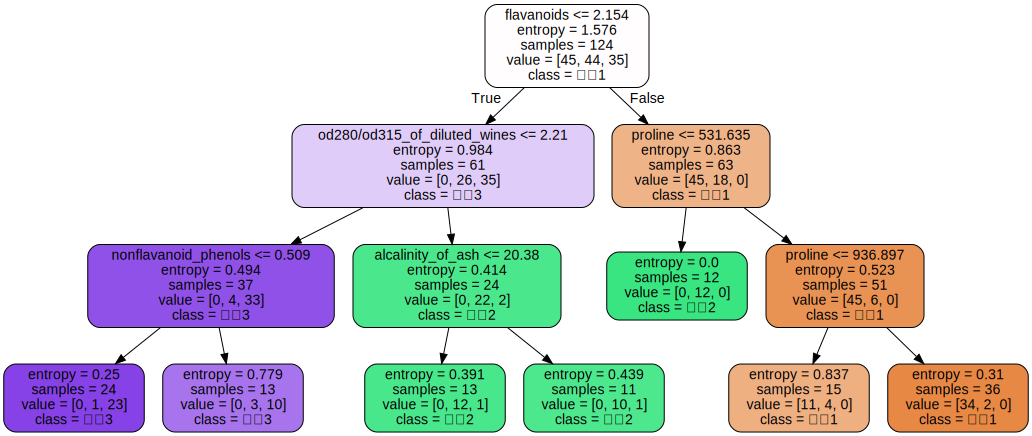

In [182]:
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter='random'
                                ,max_depth=3
                                ,min_samples_leaf=10
                                ,min_samples_split=10,
                                
                               )
# 用训练集去训练
clf=clf.fit(Xtrain,Ytrain)
# 导入测试集，从接口中获取需要的信息
res=clf.score(Xtest,Ytest)
feature_names=wine.feature_names
class_name=wine.target_names
# 初始化
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_names
                              ,class_names=['测试1','测试2','测试3']
                              ,filled=True # 上色 颜色越深，纯度越纯
                              ,rounded=True # 边角圆滑
                             )
graph=graphviz.Source(dot_data)
graph

In [183]:
# 打印预测精准度
print("预测精度：%s"%res)

预测精度：0.8518518518518519


### 3. max_features & min_impurity_decrease 限定最大特征&限制信息增益大小

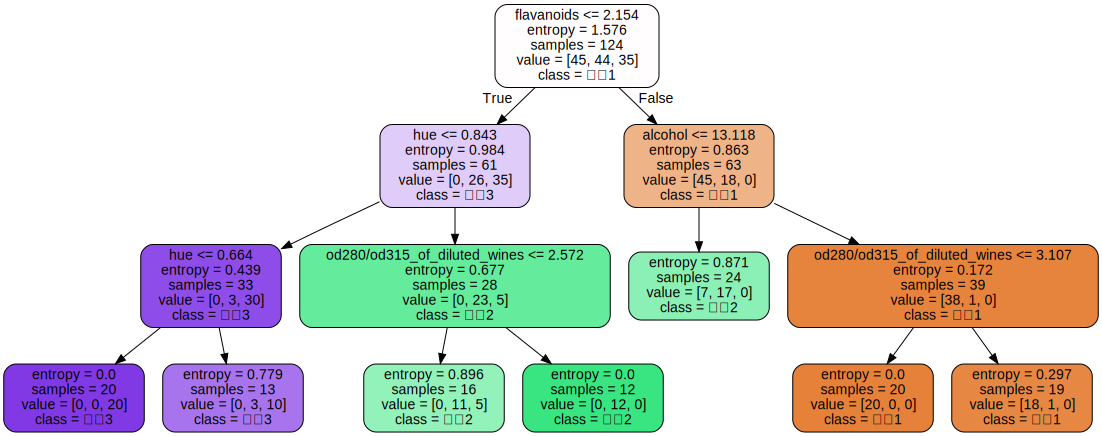

In [184]:
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter='random'
                                ,max_depth=3
                                ,min_samples_leaf=10
                                ,min_samples_split=10
                                ,max_features=10
                               )
# 用训练集去训练
clf=clf.fit(Xtrain,Ytrain)
# 导入测试集，从接口中获取需要的信息
res=clf.score(Xtest,Ytest)
feature_names=wine.feature_names
class_name=wine.target_names
# 初始化
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_names
                              ,class_names=['测试1','测试2','测试3']
                              ,filled=True # 上色 颜色越深，纯度越纯
                              ,rounded=True # 边角圆滑
                             )
graph=graphviz.Source(dot_data)
graph

In [185]:
# 打印预测精准度
print("预测精度：%s"%res)

预测精度：0.9629629629629629


### 利用超参数计算最优参数

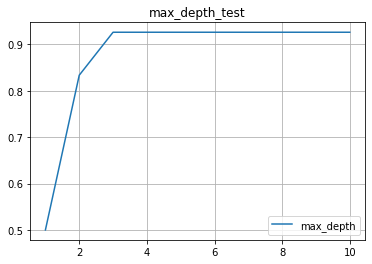

In [186]:
# 对决策树最大深度进行测试
test =[]
for i in range(1,11):
    clf=tree.DecisionTreeClassifier(criterion='entropy'
                                    ,random_state=30
                                    ,splitter='random'
                                    ,max_depth=i
                                   )
    clf=clf.fit(Xtrain,Ytrain)
    test.append(clf.score(Xtest,Ytest))
plt.plot(range(1,11),test,label="max_depth")
plt.legend()
plt.grid()
plt.title("max_depth_test")
plt.show()

## 目标权重参数

### 参数：class_weight & min_weight_fraction_leaf
**1.利用权重参数对样本标签进行一定的均衡，给少量的分类标签更大的权重，给数量多的标签较小的权重**

**2.min_weight_fraction_leaf配合权重一起使用，用于剪枝**
____

### 两个API

In [190]:
# 返回每个测试样本所在的叶子节点位置
clf.apply(Xtest)

array([20, 11, 20, 20, 13,  5,  5, 13, 20, 11, 20, 11,  5,  5,  8, 13,  8,
       11, 13, 20,  5, 11, 20,  5, 11, 19,  3, 20, 13, 11, 13, 11, 11,  5,
       20,  5,  5, 13, 11, 11,  5, 13,  5,  5,  3, 13,  5,  8, 20, 20, 13,
       13, 20, 20])

In [188]:
# 返回每个测试集对应的分类结果
clf.predict(Xtest)

array([0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 0, 1, 1, 0, 0])